In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df  = pd.read_csv("D:\\excel data\\breast-cancer-data.csv")

In [4]:
df

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,50-59',ge40',30-34',6-8',yes',2',left',left_low',no',no-recurrence-events'
282,50-59',premeno',25-29',3-5',yes',2',left',left_low',yes',no-recurrence-events'
283,30-39',premeno',30-34',6-8',yes',2',right',right_up',no',no-recurrence-events'
284,50-59',premeno',15-19',0-2',no',2',right',left_low',no',no-recurrence-events'


In [5]:
df.isnull().sum()

age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiate      0
class          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumer-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [7]:
df.describe()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
count,286,286,286,286,278,286,286,285,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,50-59',premeno',30-34',0-2',no',2',left',left_low',no',no-recurrence-events'
freq,96,150,60,213,222,130,152,110,218,201


In [12]:
df.dropna(subset=["node-caps","breast-quad"],inplace=True)

In [11]:
df.isnull().sum()

age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiate      0
class          0
dtype: int64

In [14]:
df["min_age"] = df["age"].str.split("-").apply(lambda x:x[0])

In [15]:
df.head(2)

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,min_age
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events',40
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events',50


In [16]:
df["max_age"] = df["age"].str.split("-").apply(lambda x:x[1])

In [45]:
df["max_tumer_size"] = df["tumer-size"].str.split("-").apply(lambda x:x[1])

In [43]:
df["min_tumer_size"] = df["tumer-size"].str.split("-").apply(lambda x:x[0])

In [50]:
df.drop(["tumer-size"],axis = 1,inplace=True)

In [51]:
df.head(2)

,menopause,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,min_age,max_age,min_tumer_size,max_tumer_size
0,premeno',0-2',yes',3',right',left_up',no',recurrence-events',40,49',15,19'
1,ge40',0-2',no',1',right',central',no',no-recurrence-events',50,59',15,19'


In [53]:
df["class"].value_counts()

class
no-recurrence-events'    196
recurrence-events'        81
Name: count, dtype: int64

In [55]:
df["menopause"].value_counts()

menopause
premeno'    149
ge40'       123
lt40'         5
Name: count, dtype: int64

In [22]:
df.drop(["age"],axis = 1,inplace = True)

In [56]:
df.head(2)

,menopause,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,min_age,max_age,min_tumer_size,max_tumer_size
0,premeno',0-2',yes',3',right',left_up',no',recurrence-events',40,49',15,19'
1,ge40',0-2',no',1',right',central',no',no-recurrence-events',50,59',15,19'


<Axes: xlabel='deg-malig', ylabel='Count'>

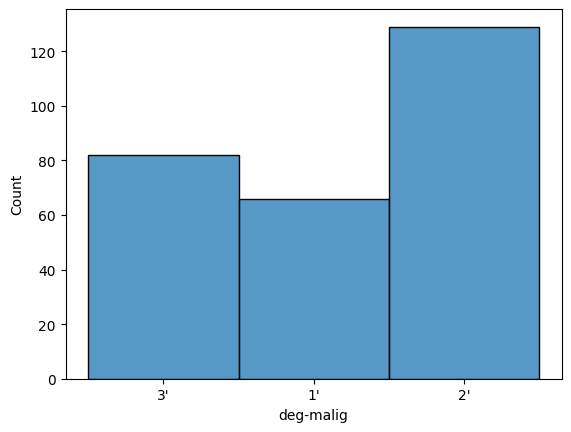

In [33]:
sns.histplot(df["deg-malig"])

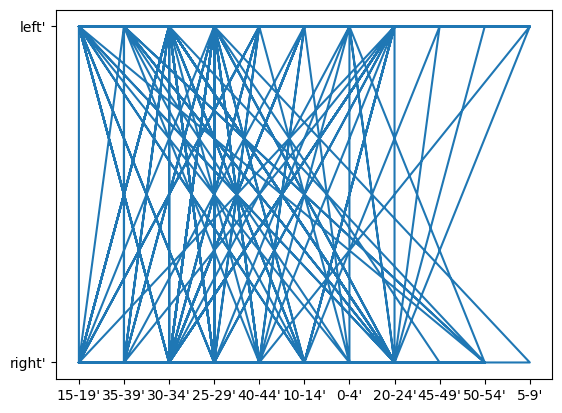

In [35]:
plt.plot(df["tumer-size"],df["breast"])
plt.show()

<Axes: xlabel='tumer-size', ylabel='Count'>

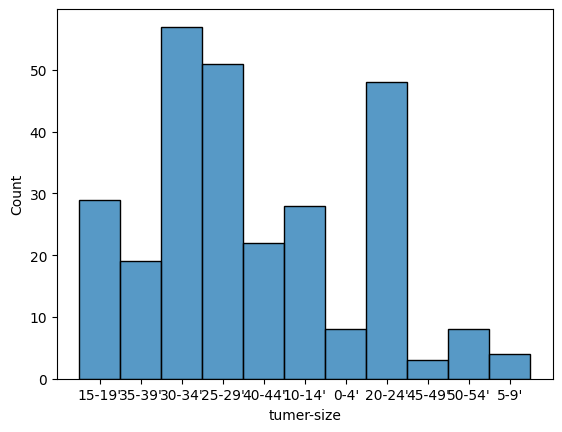

In [34]:
sns.histplot(df["tumer-size"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   menopause    277 non-null    object
 1   tumer-size   277 non-null    object
 2   inv-nodes    277 non-null    object
 3   node-caps    277 non-null    object
 4   deg-malig    277 non-null    object
 5   breast       277 non-null    object
 6   breast-quad  277 non-null    object
 7   irradiate    277 non-null    object
 8   class        277 non-null    object
 9   min_age      277 non-null    object
 10  max_age      277 non-null    object
dtypes: object(11)
memory usage: 34.1+ KB


In [42]:
from sklearn.model_selection import train_test_split